# Airline Arrivals Project



Use this dataset of airline arrival information to predict how late flights
will be. A flight only counts as late if it is more than 30 minutes late.


1. The project should follow guideline as previous projects.
2. Apply models in Naïve Bayes, Logistic Regression, Decision
Tree, Random Forest, Gradient Boosting and SVM.
3. Apply PCA, SelectKBest and RFE for feature selections.
4. Using gridsearchCV to obtain best parameters for models.
5. Compare performances among models, write up analysis
why the model is good or bad in the algorithmic approach
(explain why the algorithm is good or bad for the dataset
structure, can you do something to improve the model?)
6. Include the conclusions.




## 1. Data pre-processing
### 1.1 Importing Various Modules

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for plotting graphs
%matplotlib inline
import numpy as np
import sklearn
import time
# Import model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import gc

### 1.2 Reading the data from a CSV file


In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("2008.csv")
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


**Variable descriptions
    Name	Description
    1	Year	1987-2008
    2	Month	1-12
    3	DayofMonth	1-31
    4	DayOfWeek	1 (Monday) - 7 (Sunday)
    5	DepTime	actual departure time (local, hhmm)
    6	CRSDepTime	scheduled departure time (local, hhmm)
    7	ArrTime	actual arrival time (local, hhmm)
    8	CRSArrTime	scheduled arrival time (local, hhmm)
    9	UniqueCarrier	unique carrier code
    10	FlightNum	flight number
    11	TailNum	plane tail number
    12	ActualElapsedTime	in minutes
    13	CRSElapsedTime	in minutes
    14	AirTime	in minutes
    15	ArrDelay	arrival delay, in minutes
    16	DepDelay	departure delay, in minutes
    17	Origin	origin IATA airport code
    18	Dest	destination IATA airport code
    19	Distance	in miles
    20	TaxiIn	taxi in time, in minutes
    21	TaxiOut	taxi out time in minutes
    22	Cancelled	was the flight cancelled?
    23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
    24	Diverted	1 = yes, 0 = no
    25	CarrierDelay	in minutes
    26	WeatherDelay	in minutes
    27	NASDelay	in minutes
    28	SecurityDelay	in minutes
    29	LateAircraftDelay	in minutes

In [4]:
data.shape

(7009728, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [6]:
# Identify object columns
print(data.select_dtypes(['object']).columns)

Index(['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode'], dtype='object')


### 1.3 Check missing values

In [7]:
# Percentage of missing values
data.isnull().sum()/len(data)*100

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.943670
CRSDepTime            0.000000
ArrTime               2.163408
CRSArrTime            0.000000
UniqueCarrier         0.000000
FlightNum             0.000000
TailNum               1.189276
ActualElapsedTime     2.206919
CRSElapsedTime        0.012040
AirTime               2.206919
ArrDelay              2.206919
DepDelay              1.943670
Origin                0.000000
Dest                  0.000000
Distance              0.000000
TaxiIn                2.163408
TaxiOut               1.955254
Cancelled             0.000000
CancellationCode     98.039382
Diverted              0.000000
CarrierDelay         78.248300
WeatherDelay         78.248300
NASDelay             78.248300
SecurityDelay        78.248300
LateAircraftDelay    78.248300
dtype: float64

**CancellationCode  CarrierDelay  WeatherDelay  NASDelay   SecurityDelay   LateAircraftDelay   are over 70%  -> drop these columns
** The other missing value is around 2% -> small amount -> removed these row data

In [8]:
data = data.drop(['CancellationCode','CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
data = data.dropna()


#### We call CarrierDelay  WeatherDelay  NASDelay   SecurityDelay   LateAircraftDelay are Other_delay

In [9]:
data['other_delay'] = data['ActualElapsedTime'] - data['AirTime'] - data['ArrDelay'] - data['DepDelay']

In [10]:
data.shape

(6855024, 24)

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,6855024.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,6855024.0,6.388525,3.398833,1.0,3.0,6.0,9.0,12.0
DayofMonth,6855024.0,15.738256,8.801085,1.0,8.0,16.0,23.0,31.0
DayOfWeek,6855024.0,3.925802,1.988459,1.0,2.0,4.0,6.0,7.0
DepTime,6855024.0,1333.775377,478.057428,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,6855024.0,1325.037351,464.313019,0.0,925.0,1317.0,1715.0,2359.0
ArrTime,6855024.0,1481.265468,505.132240,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,6855024.0,1493.714769,482.664252,0.0,1115.0,1515.0,1905.0,2359.0
FlightNum,6855024.0,2212.505007,1956.435438,1.0,618.0,1563.0,3494.0,9741.0
ActualElapsedTime,6855024.0,127.322441,70.187326,12.0,77.0,110.0,157.0,1379.0


#### Cancelled	& Diverted	 are 0 -> drop them

In [12]:
data = data.drop(['Cancelled','Diverted'], axis=1)


## 1.4 Data exploration

#### 1.4.1 CORRELATION

#### **Due to memory Error , I reduce the data to 15%

In [13]:
data = data.sample(frac=0.15, random_state=1)


In [14]:
data.shape

(1028254, 22)

Text(0.5, 1, 'Variable Correlation')

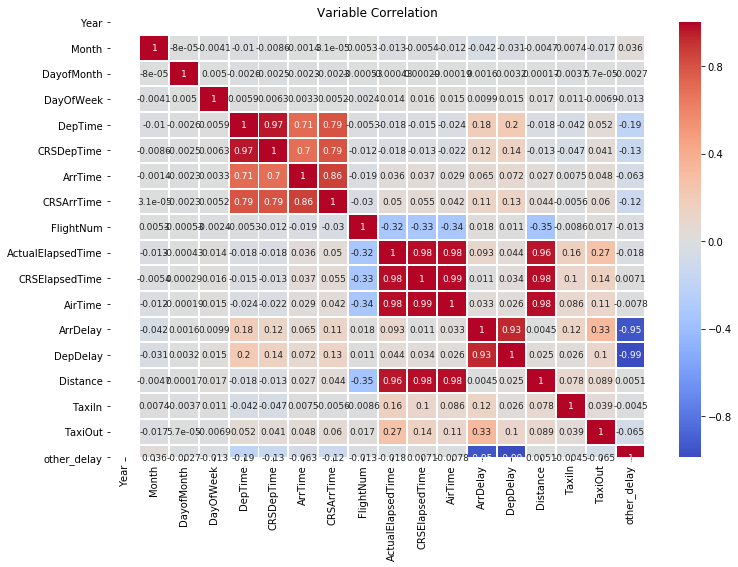

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

 DepTime & CRSDepTime   , ArrTime & CRSArrTime have high correlation score we should drop one of them 
 
 

In [16]:
# Instead We create a DEPARTURE_DELAY  and ARRIVAL_DELAY 
# data['DEPARTURE_DELAY'] = data['DepTime'] - data['CRSDepTime']
# data['ARRIVAL_DELAY'] = data['ArrTime'] - data['CRSArrTime']

In [17]:
# Drop DepTime & ArrTime
data = data.drop(['DepTime','ArrTime'], axis=1)


In [18]:
# AirTime & Distance
#Drop AirTime
data = data.drop(['AirTime'], axis=1)

#### ActualElapsedTime	CRSElapsedTime have high correlation score we should drop one of them
#### Instead We create a Flight_DELAY lable 'isDelayed' = CRSElapsedTime -  ActualElapsedTime	 
####                                                                Delay ( >  20 mins ) : 1
####                                                                Not delay    :0
#### Then drop CRSElapsedTime & ActualElapsedTime

In [19]:
data['isDelayed'] = (data['CRSElapsedTime'] - data['ActualElapsedTime'])

In [20]:
data['isDelayed'] = data['isDelayed'].apply(lambda x: 1 if x > 20 else 0)

In [21]:

data['isDelayed'].describe()

count    1.028254e+06
mean     4.214815e-02
std      2.009271e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isDelayed, dtype: float64

In [22]:
data = data.drop(['CRSElapsedTime', 'ActualElapsedTime'], axis=1)

([<matplotlib.patches.Wedge at 0x28a9b1a8408>,
 [Text(-1.0903709086861022, 0.14522837701718042, 'yes'),
  Text(1.0903708967884942, -0.14522846634408532, 'no')],
 [Text(-0.5947477683742375, 0.07921547837300749, '96%'),
  Text(0.5947477618846331, -0.07921552709677379, '4%')])

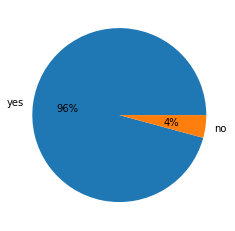

In [23]:
sr = data['isDelayed'].value_counts()
plt.pie(sr.values, 
                                labels=['yes','no'],  autopct='%1.0f%%',
                                shadow=False, startangle=0)

> The data is  imbalanced -> we might resample later

### TaxiIn & TaxiOut seems that doesn't affect to the flight so that we remove them

In [24]:
data = data.drop(['TaxiIn', 'TaxiOut'], axis=1)

### CRSDepTime is varied  from 0000 - 2400  so that we group them to DepTime_lb every 2 hour them drop CRSDepTime & DepTime

In [25]:
data['DepTime_lb'] = data['CRSDepTime'];
data['DepTime_lb']=np.where( (data['DepTime_lb'] >= 0) & ( data['DepTime_lb'] <= 200 ) , 2, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 200) & ( data['DepTime_lb'] <= 400 ) , 4, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 400) & ( data['DepTime_lb'] <= 600 ) , 6, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 600) & ( data['DepTime_lb'] <= 800 ) , 8, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 800) & ( data['DepTime_lb'] <= 1000 ) , 10, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1000) & ( data['DepTime_lb'] <= 1200 ) , 12, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1200) & ( data['DepTime_lb'] <= 1400 ) , 14, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1400) & ( data['DepTime_lb'] <= 1600 ) , 16, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1600) & ( data['DepTime_lb'] <= 1800 ) , 18, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 1800) & ( data['DepTime_lb'] <= 2000 ) , 20, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 2000) & ( data['DepTime_lb'] <= 2200 ) , 22, data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] > 2200) & ( data['DepTime_lb'] <= 2400 ) , 24, data['DepTime_lb'] )

data['DepTime_lb'] = data['DepTime_lb'] .astype('object') 

data['DepTime_lb']=np.where( (data['DepTime_lb'] == 2) , '0_2', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 4) , '2_4', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 6) , '4_6', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 8) , '6_8', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 10) , '8_10', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 12) , '10_12', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 14) , '12_14', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 16) , '14_16', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 18) , '16_18', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 20) , '18_20', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 22) , '20_22', data['DepTime_lb'] )
data['DepTime_lb']=np.where( (data['DepTime_lb'] == 24) , '22_24', data['DepTime_lb'] )

In [26]:
data['DepTime_lb'].unique()


array(['12_14', '14_16', '10_12', '6_8', '8_10', '16_18', '4_6', '18_20',
       '20_22', '22_24', '0_2', '2_4'], dtype=object)

In [27]:
data = data.drop(['CRSDepTime'], axis=1)

In [28]:
data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ArrDelay', 'DepDelay',
       'Origin', 'Dest', 'Distance', 'other_delay', 'isDelayed', 'DepTime_lb'],
      dtype='object')

### Convert CRSArrTime  label like DepTime_lb does

In [29]:

data['CRSArrTime']=np.where( (data['CRSArrTime'] >= 0) & ( data['CRSArrTime'] <= 200 ) , 2, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 200) & ( data['CRSArrTime'] <= 400 ) , 4, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 400) & ( data['CRSArrTime'] <= 600 ) , 6, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 600) & ( data['CRSArrTime'] <= 800 ) , 8, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 800) & ( data['CRSArrTime'] <= 1000 ) , 10, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1000) & ( data['CRSArrTime'] <= 1200 ) , 12, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1200) & ( data['CRSArrTime'] <= 1400 ) , 14, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1400) & ( data['CRSArrTime'] <= 1600 ) , 16, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1600) & ( data['CRSArrTime'] <= 1800 ) , 18, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 1800) & ( data['CRSArrTime'] <= 2000 ) , 20, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 2000) & ( data['CRSArrTime'] <= 2200 ) , 22, data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] > 2200) & ( data['CRSArrTime'] <= 2400 ) , 24, data['CRSArrTime'] )

data['CRSArrTime'] = data['CRSArrTime'] .astype('object') 

data['CRSArrTime']=np.where( (data['CRSArrTime'] == 2) , '0_2', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 4) , '2_4', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 6) , '4_6', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 8) , '6_8', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 10) , '8_10', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 12) , '10_12', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 14) , '12_14', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 16) , '14_16', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 18) , '16_18', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 20) , '18_20', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 22) , '20_22', data['CRSArrTime'] )
data['CRSArrTime']=np.where( (data['CRSArrTime'] == 24) , '22_24', data['CRSArrTime'] )

In [30]:
data['CRSArrTime'].unique()


array(['16_18', '12_14', '6_8', '10_12', '20_22', '18_20', '22_24', '4_6',
       '8_10', '14_16', '0_2', '2_4'], dtype=object)

In [31]:
t1 = data.groupby(['CRSArrTime', 'isDelayed']).CRSArrTime.agg('count').to_frame('num').reset_index()
# sns.pointplot(x='YearsWithCurrManager', y='num_emp', hue='Attrition', data=data_2_3)
t1

,CRSArrTime,isDelayed,num
0,0_2,0,7929
1,0_2,1,986
2,10_12,0,126952
3,10_12,1,4520
4,12_14,0,124995
5,12_14,1,4337
6,14_16,0,124218
7,14_16,1,4634
8,16_18,0,130048
9,16_18,1,5681


Text(0.5, 1.0, 'Statistic the delay in ArrTime ')

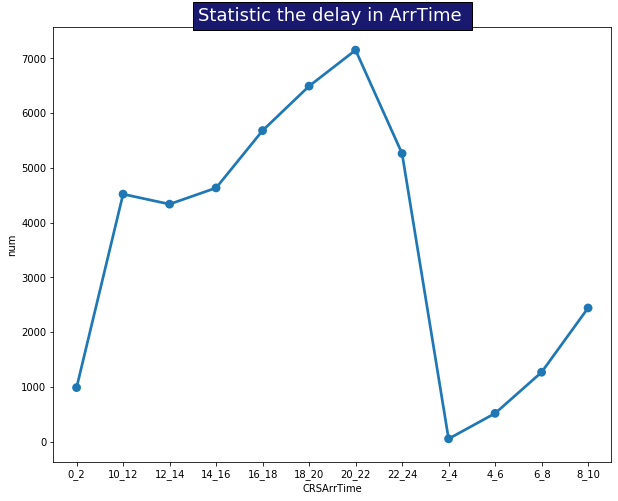

In [32]:
plt.figure(figsize=(10,8))
sns.pointplot(x='CRSArrTime', y='num', data=t1[ t1['isDelayed'] == 1])
plt.title('Statistic the delay in ArrTime ', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)

> if the customer takes a flight which has the arrTime in 20-22h , the risk to be delayed will be higher

In [120]:
# data.groupby('CRSArrTime').mean()

### FlightNum is the order number of Flight in the year -> we can remove this column from the data

In [34]:
data = data.drop(['FlightNum'], axis=1)

### 'Month', 'DayofMonth', 'DayOfWeek'

In [35]:
data.select_dtypes(['float64','int64']).columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'DepDelay',
       'Distance', 'other_delay', 'isDelayed'],
      dtype='object')

In [36]:
data['day'] = data['DayofMonth']
data['DATE'] = pd.to_datetime(data[['Year','Month', 'day']] )

In [37]:
data['DATE']

320668    2008-01-30
214156    2008-01-29
6945414   2008-12-06
1227056   2008-03-18
6984991   2008-12-13
             ...    
111248    2008-01-12
1244462   2008-03-23
1805054   2008-04-07
2583731   2008-05-18
5528508   2008-10-09
Name: DATE, Length: 1028254, dtype: datetime64[ns]

In [38]:
data = data.drop(['Year', 'day'], axis=1)

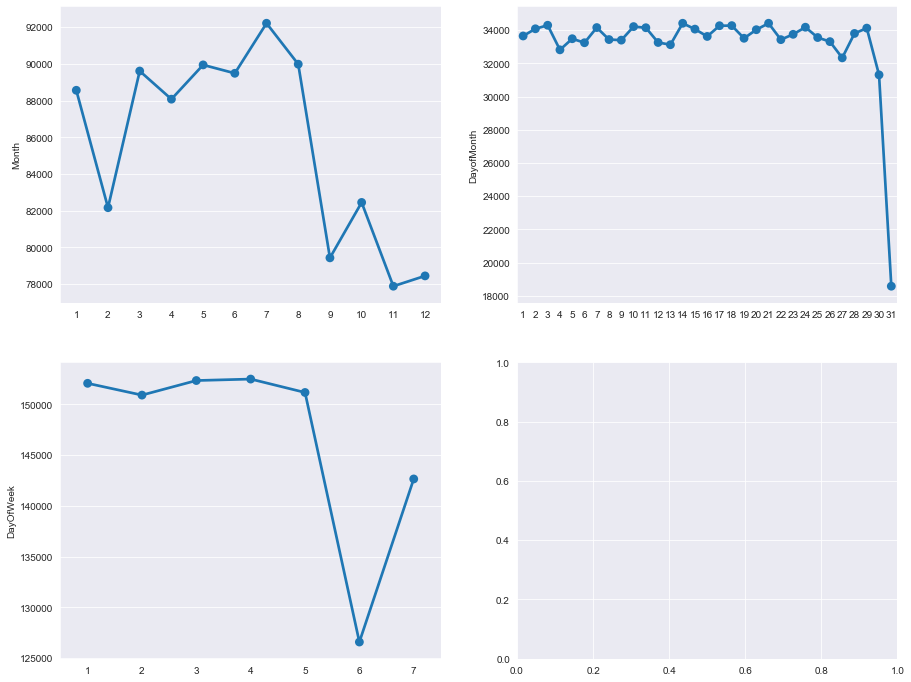

In [206]:


sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,12))

sns.pointplot(x=data.Month.value_counts().index, y=data.Month.value_counts(), data=data[ data['isDelayed'] == 1], ax= axes[0,0] )
sns.pointplot(x=data.DayofMonth.value_counts().index, y=data.DayofMonth.value_counts(), data=data[ data['isDelayed'] == 1], ax= axes[0,1] )
sns.pointplot(x=data.DayOfWeek.value_counts().index, y=data.DayOfWeek.value_counts(), data=data[ data['isDelayed'] == 1], ax= axes[1,0] )



plt.show()




> The delayed flights are higher from March - Sept 
> the rate of delay is low at Friday or on te end of month

### 'ArrDelay' ,   'DepDelay'  , 'other_delay'

In [40]:
data['ArrDelay'].describe()

count    1.028254e+06
mean     8.200294e+00
std      3.839452e+01
min     -9.200000e+01
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      1.542000e+03
Name: ArrDelay, dtype: float64

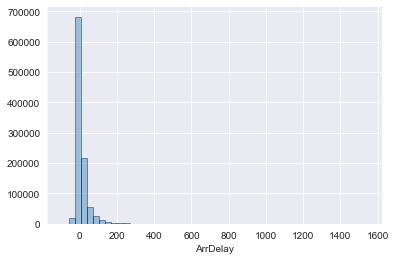

In [41]:
sns.distplot(data['ArrDelay'], kde = False,hist_kws=dict(edgecolor="k"))

In [42]:
data['DepDelay'].describe()

count    1.028254e+06
mean     9.944201e+00
std      3.503954e+01
min     -6.700000e+01
25%     -4.000000e+00
50%     -1.000000e+00
75%      8.000000e+00
max      1.545000e+03
Name: DepDelay, dtype: float64

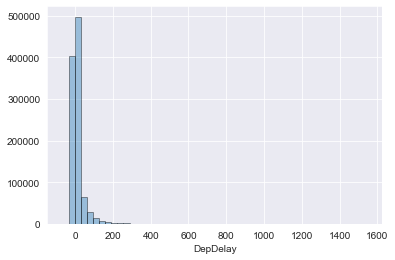

In [43]:
sns.distplot(data['DepDelay'], kde = False,hist_kws=dict(edgecolor="k"))

23980639.0


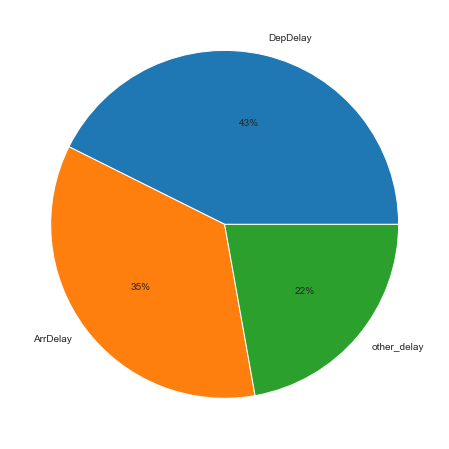

In [44]:
DepDelay= data['DepDelay'].values.sum()
ArrDelay =  data['ArrDelay'].values.sum()
other_delay = data['other_delay'].values.sum()
sizes = DepDelay + ArrDelay + other_delay
explode = [DepDelay , ArrDelay ,other_delay  ]
labels = ['DepDelay','ArrDelay','other_delay']
plt.figure(1, figsize=(12,8))
plt.pie(explode, 
                                labels=labels,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
print(sizes)

### Distance

In [45]:
# data['Distance'].describe()

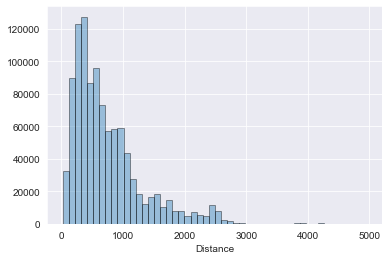

In [46]:
sns.distplot(data['Distance'], kde = False,hist_kws=dict(edgecolor="k"))

> almost the distance is < 1000km

In [287]:
# data.select_dtypes(['object']).columns

### UniqueCarrier

In [48]:
data.UniqueCarrier.unique()

array(['DL', 'OO', 'AS', 'WN', 'CO', 'XE', 'FL', 'EV', 'MQ', 'UA', 'US',
       'NW', 'B6', 'AA', 'HA', 'F9', '9E', 'YV', 'OH', 'AQ'], dtype=object)

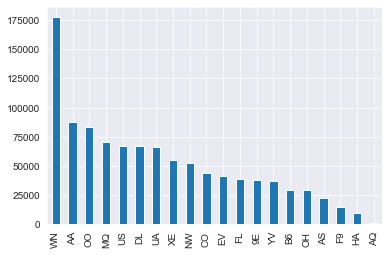

In [288]:
data.UniqueCarrier.value_counts().plot(kind='bar')

 > WN is the branch which has most flights

### TailNum

In [50]:
df = data.TailNum.unique()
df.shape

(5329,)

In [51]:
df

array(['N3744D', 'N284YV', 'N713AS', ..., 'N198UA', 'N979AS', 'N178DN'],
      dtype=object)

> we might use LabelEncoder to this columns due to TailNum has to many  unique value > 5000

In [52]:
# we decide to drop this columns due to it has too many unique values > 5000
data = data.drop(['TailNum'], axis=1)

### Origin Airport

In [54]:
t1 = data.groupby(['Origin']).Origin.agg('count').to_frame('num').reset_index()
t1.describe()

,num
count,300.000000
mean,3427.513333
std,7430.295242
min,10.000000
25%,201.500000
50%,642.000000
75%,2425.250000
max,61519.000000


In [55]:
t1.max()


Origin      YUM
num       61519
dtype: object

In [56]:
t1.min()

Origin    ABE
num        10
dtype: object

> **There Are 303 different Air ports 
> Max  :  YUM have 407701 flights / year
> Min  :  ABE have 2 flights / year**

In [57]:

df_o =   data.groupby(['Origin' , 'isDelayed']).Origin.agg('count').to_frame('num').reset_index()
# df_o


In [58]:
df_o[ df_o['isDelayed'] == 1 ].max()

Origin        YUM
isDelayed       1
num          3110
dtype: object

In [59]:
df_o[ df_o['isDelayed'] == 1 ].mean()

isDelayed      1.000000
num          190.920705
dtype: float64

> **isDelayed   : **
    XNA have 8401 delayed flights / year
>  Mean 313  :  the average delayed flights is 313  / year

### Destination  Airport

In [60]:
df_d_lb = data.Dest.unique()  
df_o_lb = data.Origin.unique() 

In [61]:
df_d_lb

array(['LAX', 'SFO', 'CDV', 'BUR', 'EGE', 'IAH', 'MDW', 'ATL', 'MSP',
       'OKC', 'MKE', 'TPA', 'GEG', 'JFK', 'CLE', 'IAD', 'SEA', 'HNL',
       'DEN', 'GGG', 'MCO', 'MEM', 'LAS', 'JAN', 'ROC', 'AUS', 'SGF',
       'JAX', 'MSY', 'PBI', 'BOS', 'ORD', 'BUF', 'STL', 'BHM', 'DSM',
       'DAL', 'FAY', 'DFW', 'FAR', 'PHX', 'OAK', 'EWR', 'PFN', 'ANC',
       'DCA', 'LGA', 'PHL', 'MIA', 'SLC', 'GSO', 'ELP', 'SAN', 'BWI',
       'CLT', 'SMF', 'FLL', 'COS', 'SJU', 'MCI', 'SAT', 'SPI', 'RNO',
       'SHV', 'HOU', 'DTW', 'RIC', 'RDU', 'PIT', 'SJC', 'SNA', 'TLH',
       'AMA', 'PDX', 'BDL', 'MOT', 'PSP', 'LIT', 'BNA', 'HHH', 'LFT',
       'RSW', 'LIH', 'CMH', 'LBB', 'RAP', 'LCH', 'CVG', 'FSM', 'ALB',
       'BZN', 'ABQ', 'PHF', 'GUC', 'SDF', 'MGM', 'GRR', 'CHS', 'CID',
       'IND', 'MSN', 'GRB', 'FNT', 'SBN', 'MLI', 'OGG', 'KOA', 'LGB',
       'GPT', 'ROA', 'ASE', 'ORF', 'DAY', 'FAI', 'SRQ', 'LEX', 'CAK',
       'BIL', 'ICT', 'XNA', 'MAF', 'MHT', 'PLN', 'SYR', 'ISP', 'MYR',
       'MLB', 'SAV',

In [121]:
# t1 = data.groupby(['Dest']).Origin.agg('count').to_frame('num').reset_index()
# t1.describe()

In [64]:
# check how many duplicated between Origin Air port and Destination Airport
matches = np.intersect1d(df_d_lb, df_o_lb)
len(matches)

300

> **The Airport in Origin and Destination is the same -> so I think the reason causes the delay of these airport is the same so that we will only choose Destination Airport to build the model**

### Create dummy variables - ( Encoding categorical variable)

In [65]:
data.columns.values

array(['Month', 'DayofMonth', 'DayOfWeek', 'CRSArrTime', 'UniqueCarrier',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'other_delay', 'isDelayed', 'DepTime_lb', 'DATE'], dtype=object)

In [66]:

cat_vars=[ 'CRSArrTime', 'UniqueCarrier',  'Dest', 'DepTime_lb' ]
data_dummy = pd.get_dummies(data=data, columns= [ 'CRSArrTime', 'UniqueCarrier',  'Dest', 'DepTime_lb' ] )
data_dummy

,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,Origin,Distance,other_delay,isDelayed,DATE,CRSArrTime_0_2,CRSArrTime_10_12,CRSArrTime_12_14,CRSArrTime_14_16,CRSArrTime_16_18,CRSArrTime_18_20,CRSArrTime_20_22,CRSArrTime_22_24,CRSArrTime_2_4,CRSArrTime_4_6,CRSArrTime_6_8,CRSArrTime_8_10,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BJI,Dest_BLI,Dest_BMI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BPT,Dest_BQK,Dest_BQN,Dest_BRO,Dest_BRW,Dest_BTM,Dest_BTR,Dest_BTV,Dest_BUF,Dest_BUR,Dest_BWI,Dest_BZN,Dest_CAE,Dest_CAK,Dest_CDC,Dest_CDV,Dest_CEC,Dest_CHA,Dest_CHO,Dest_CHS,Dest_CIC,Dest_CID,Dest_CLD,Dest_CLE,Dest_CLL,Dest_CLT,Dest_CMH,Dest_CMI,Dest_CMX,Dest_COD,Dest_COS,Dest_CPR,Dest_CRP,Dest_CRW,Dest_CSG,Dest_CVG,Dest_CWA,Dest_DAB,Dest_DAL,Dest_DAY,Dest_DBQ,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DHN,Dest_DLG,Dest_DLH,Dest_DRO,Dest_DSM,Dest_DTW,Dest_EGE,Dest_EKO,Dest_ELM,Dest_ELP,Dest_ERI,Dest_EUG,Dest_EVV,Dest_EWN,Dest_EWR,Dest_EYW,Dest_FAI,Dest_FAR,Dest_FAT,Dest_FAY,Dest_FCA,Dest_FLG,Dest_FLL,Dest_FLO,Dest_FNT,Dest_FSD,Dest_FSM,Dest_FWA,Dest_GCC,Dest_GEG,Dest_GFK,Dest_GGG,Dest_GJT,Dest_GNV,Dest_GPT,Dest_GRB,Dest_GRK,Dest_GRR,Dest_GSO,Dest_GSP,Dest_GST,Dest_GTF,Dest_GTR,Dest_GUC,Dest_HDN,Dest_HHH,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_INL,Dest_IPL,Dest_ISP,Dest_ITH,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAW,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest_TEX,Dest_TLH,Dest_TOL,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUP,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,DepTime_lb_0_2,DepTime_lb_10_12,DepTime_lb_12_14,DepTime_lb_14_16,DepTime_lb_16_18,DepTime_lb_18_20,DepTime_lb_20_22,DepTime_lb_22_24,DepTime_lb_2_4,DepTime_lb_4_6,DepTime_lb_6_8,DepTime_lb_8_10
320668,1,30,3,-2.0,-4.0,JFK,2475,47.0,0,2008-01-30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [67]:
cat_vars= data.columns.values
data_vars=data_dummy.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_dummy=data_dummy[to_keep]


In [102]:
# data_dummy.columns.values

In [69]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# data['TailNum_lb_encoder'] = le.fit_transform(data['TailNum'])

In [70]:
# data['TailNum_lb_encoder']

#### Engineering Features Summary

In [71]:
data.select_dtypes(['float64','int64']).columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'DepDelay', 'Distance',
       'other_delay', 'isDelayed'],
      dtype='object')

**We have created 349 features for our machine learning models. They are divided as follows:
**Ø 7 Numerical Features  : 'Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'DepDelay', 'Distance',
       'other_delay'
**Ø 342  Categorical Features after OneHotencode
** Target is : 'isDelayed'

In [72]:
# numberic only
cols = ['Month', 'DayofMonth', 'DayOfWeek', 'ArrDelay', 'DepDelay',
       'Distance', 'other_delay'];
final_data =  data[cols].join(data_dummy)
final_data

,Month,DayofMonth,DayOfWeek,ArrDelay,DepDelay,Distance,other_delay,CRSArrTime_0_2,CRSArrTime_10_12,CRSArrTime_12_14,CRSArrTime_14_16,CRSArrTime_16_18,CRSArrTime_18_20,CRSArrTime_20_22,CRSArrTime_22_24,CRSArrTime_2_4,CRSArrTime_4_6,CRSArrTime_6_8,CRSArrTime_8_10,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,UniqueCarrier_DL,UniqueCarrier_EV,UniqueCarrier_F9,UniqueCarrier_FL,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV,Dest_ABE,Dest_ABI,Dest_ABQ,Dest_ABY,Dest_ACK,Dest_ACT,Dest_ACV,Dest_ACY,Dest_ADK,Dest_ADQ,Dest_AEX,Dest_AGS,Dest_AKN,Dest_ALB,Dest_ALO,Dest_AMA,Dest_ANC,Dest_ASE,Dest_ATL,Dest_ATW,Dest_AUS,Dest_AVL,Dest_AVP,Dest_AZO,Dest_BDL,Dest_BET,Dest_BFL,Dest_BGM,Dest_BGR,Dest_BHM,Dest_BIL,Dest_BIS,Dest_BJI,Dest_BLI,Dest_BMI,Dest_BNA,Dest_BOI,Dest_BOS,Dest_BPT,Dest_BQK,Dest_BQN,Dest_BRO,Dest_BRW,Dest_BTM,Dest_BTR,Dest_BTV,Dest_BUF,Dest_BUR,Dest_BWI,Dest_BZN,Dest_CAE,Dest_CAK,Dest_CDC,Dest_CDV,Dest_CEC,Dest_CHA,Dest_CHO,Dest_CHS,Dest_CIC,Dest_CID,Dest_CLD,Dest_CLE,Dest_CLL,Dest_CLT,Dest_CMH,Dest_CMI,Dest_CMX,Dest_COD,Dest_COS,Dest_CPR,Dest_CRP,Dest_CRW,Dest_CSG,Dest_CVG,Dest_CWA,Dest_DAB,Dest_DAL,Dest_DAY,Dest_DBQ,Dest_DCA,Dest_DEN,Dest_DFW,Dest_DHN,Dest_DLG,Dest_DLH,Dest_DRO,Dest_DSM,Dest_DTW,Dest_EGE,Dest_EKO,Dest_ELM,Dest_ELP,Dest_ERI,Dest_EUG,Dest_EVV,Dest_EWN,Dest_EWR,Dest_EYW,Dest_FAI,Dest_FAR,Dest_FAT,Dest_FAY,Dest_FCA,Dest_FLG,Dest_FLL,Dest_FLO,Dest_FNT,Dest_FSD,Dest_FSM,Dest_FWA,Dest_GCC,Dest_GEG,Dest_GFK,Dest_GGG,Dest_GJT,Dest_GNV,Dest_GPT,Dest_GRB,Dest_GRK,Dest_GRR,Dest_GSO,Dest_GSP,Dest_GST,Dest_GTF,Dest_GTR,Dest_GUC,Dest_HDN,Dest_HHH,Dest_HLN,Dest_HNL,Dest_HOU,Dest_HPN,Dest_HRL,Dest_HSV,Dest_HTS,Dest_IAD,Dest_IAH,Dest_ICT,Dest_IDA,Dest_ILM,Dest_IND,Dest_INL,Dest_IPL,Dest_ISP,Dest_ITH,Dest_ITO,Dest_IYK,Dest_JAC,Dest_JAN,Dest_JAX,Dest_JFK,Dest_JNU,Dest_KOA,Dest_KTN,Dest_LAN,Dest_LAS,Dest_LAW,Dest_LAX,Dest_LBB,Dest_LCH,Dest_LEX,Dest_LFT,Dest_LGA,Dest_LGB,Dest_LIH,Dest_LIT,Dest_LMT,Dest_LNK,Dest_LRD,Dest_LSE,Dest_LWB,Dest_LWS,Dest_LYH,Dest_MAF,Dest_MBS,Dest_MCI,Dest_MCN,Dest_MCO,Dest_MDT,Dest_MDW,Dest_MEI,Dest_MEM,Dest_MFE,Dest_MFR,Dest_MGM,Dest_MHT,Dest_MIA,Dest_MKE,Dest_MKG,Dest_MLB,Dest_MLI,Dest_MLU,Dest_MOB,Dest_MOD,Dest_MOT,Dest_MQT,Dest_MRY,Dest_MSN,Dest_MSO,Dest_MSP,Dest_MSY,Dest_MTJ,Dest_MYR,Dest_OAJ,Dest_OAK,Dest_OGG,Dest_OKC,Dest_OMA,Dest_OME,Dest_ONT,Dest_ORD,Dest_ORF,Dest_OTH,Dest_OTZ,Dest_OXR,Dest_PBI,Dest_PDX,Dest_PFN,Dest_PHF,Dest_PHL,Dest_PHX,Dest_PIA,Dest_PIH,Dest_PIT,Dest_PLN,Dest_PMD,Dest_PNS,Dest_PSC,Dest_PSE,Dest_PSG,Dest_PSP,Dest_PVD,Dest_PWM,Dest_RAP,Dest_RDD,Dest_RDM,Dest_RDU,Dest_RFD,Dest_RHI,Dest_RIC,Dest_RKS,Dest_RNO,Dest_ROA,Dest_ROC,Dest_ROW,Dest_RST,Dest_RSW,Dest_SAN,Dest_SAT,Dest_SAV,Dest_SBA,Dest_SBN,Dest_SBP,Dest_SCC,Dest_SCE,Dest_SDF,Dest_SEA,Dest_SFO,Dest_SGF,Dest_SGU,Dest_SHV,Dest_SIT,Dest_SJC,Dest_SJT,Dest_SJU,Dest_SLC,Dest_SLE,Dest_SMF,Dest_SMX,Dest_SNA,Dest_SPI,Dest_SPS,Dest_SRQ,Dest_STL,Dest_STT,Dest_STX,Dest_SUN,Dest_SUX,Dest_SWF,Dest_SYR,Dest_TEX,Dest_TLH,Dest_TOL,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUP,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,DepTime_lb_0_2,DepTime_lb_10_12,DepTime_lb_12_14,DepTime_lb_14_16,DepTime_lb_16_18,DepTime_lb_18_20,DepTime_lb_20_22,DepTime_lb_22_24,DepTime_lb_2_4,DepTime_lb_4_6,DepTime_lb_6_8,DepTime_lb_8_10
320668,1,30,3,-2.0,-4.0,2475,47.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Confirm with teacher should we StandardScaler only numeric features first then megre to dummy data later ?

In [73]:
X=final_data
y=data['isDelayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [74]:
X_train.shape

(719777, 352)

In [75]:
# use StandardScaler
scaler = StandardScaler()
scalerX = scaler.fit(X_train)
X_train_scaled = scalerX.transform(X_train)

In [76]:
X_test_scaled = scalerX.transform(X_test)

In [77]:
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns

## 2. MODEL SELECTION: BASELINE MODELS

We will compare the performance of the following 6 machine learning models using default hyperparameters:

· Logistic regression

· Naive Bayes

· Decision tree

· Random forest

· Gradient boosting classifier

. SVM 

In [103]:
model_name=[]
traning_scores = []
test_scores = []

### 2.1 Logistic regression
Logistic regression is executed when the dependent variable is binary. It is a predictive analysis technique. It describes data and explains the relationship between one dependent binary variable and one or more independent variables. The model is usually easy to interpret, and we can know which feature is important for us. We need to scale our data before applying this model to it.

In [79]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
#Predicting the test set results and caculating the accuracy
y_pred = logreg.predict(X_test_scaled)

#### Confusion Matrix

In [81]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[295467      7]
 [    34  12969]]


The result is telling us that we have 39416+17126 correct predictions and 16+0 incorrect predictions.

####  Accuracy

In [104]:
a = logreg.score(X_train_scaled, y_train)
b = logreg.score(X_test_scaled, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('LR')
print('Accuracy of Logistic regression on training set: {:.2f}'
     .format(a))
print('Accuracy of Logistic regression on test set: {:.2f}'
     .format(b))

Accuracy of Logistic regression on training set: 1.00
Accuracy of Logistic regression on test set: 1.00


#### Compute precision, recall, F-measure and support

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    295474
           1       1.00      1.00      1.00     13003

    accuracy                           1.00    308477
   macro avg       1.00      1.00      1.00    308477
weighted avg       1.00      1.00      1.00    308477



#### conclusion
**Of the entire test set, the model can predict right  100%
**The training time of this model is longest (almost 5mins ) -> double check dataset

### 2.2 Naive Bayes
Naive Bayes is a machine learning model that uses the Bayes rule. It is called so because it assumes that all the variables are independent of each other. This is a good assumption in case of natural language processing. 

In [84]:
nbclf = GaussianNB().fit(X_train_scaled, y_train)

In [85]:
#Predicting the test set results and caculating the accuracy
y_pred = nbclf.predict(X_test_scaled)

In [105]:
a = nbclf.score(X_train_scaled, y_train)
b = nbclf.score(X_test_scaled, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('NB')
print('Accuracy of Naive Bayes on training set: {:.2f}'
     .format(a))
print('Accuracy of Naive Bayes on test set: {:.2f}'
     .format(b))

Accuracy of Naive Bayes on training set: 0.11
Accuracy of Naive Bayes on test set: 0.11


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.07      0.13    295474
           1       0.04      0.99      0.09     13003

    accuracy                           0.11    308477
   macro avg       0.52      0.53      0.11    308477
weighted avg       0.95      0.11      0.13    308477



#### conclusion
   the model can predict right  11% -> not really reliable

### 2.3 Decision tree

Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

Machine learning models can also be tree-based. We will first look at Decision Tree. In this model, we divide samples by splitting them based on a threshold. In each question, you ask if the samples have a specific variable greater than some threshold and then split the samples. The final prediction is the fraction of positive samples in the final split of the tree. We need to figure out what threshold to select for each split. They usually do not have any presumptions and we need to provide sufficient depth for the split.

In [88]:
# Setting max decision tree depth to help avoid overfitting
dt_clf = DecisionTreeClassifier(max_depth = 3).fit(X_train_scaled, y_train)


Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.98


In [106]:
a = dt_clf.score(X_train_scaled, y_train)
b = dt_clf.score(X_test_scaled, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('DT')
print('Accuracy of Decision tree on training set: {:.2f}'
     .format(a))
print('Accuracy of Decision tree on test set: {:.2f}'
     .format(b))

Accuracy of Decision tree on training set: 0.98
Accuracy of Decision tree on test set: 0.98


In [89]:
#Predicting the test set results and caculating the accuracy
y_pred = dt_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    295474
           1       0.90      0.56      0.69     13003

    accuracy                           0.98    308477
   macro avg       0.94      0.78      0.84    308477
weighted avg       0.98      0.98      0.98    308477



#### conclusion
   the model can predict right  94% -> better than Naive Bayes

### 2.4 Random forest
Decision trees tend to result in overfitting because they memorize the training data. Random forest helps overcome this disadvantage. Multiple trees are generated, and results are then aggregated. Random forests tend to perform better than decision trees because they can generalize easily.

In [90]:
# Setting max decision tree depth to help avoid overfitting
rf_clf = RandomForestClassifier(n_estimators =5,max_depth =3)  #n_estimators default = 10
rf_clf.fit(X_train_scaled, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
a = rf_clf.score(X_train_scaled, y_train)
b = rf_clf.score(X_test_scaled, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('RF')
print('Accuracy of Random forest on training set: {:.2f}'
     .format(a))
print('Accuracy of Random forest on test set: {:.2f}'
     .format(b))

Accuracy of Random forest on training set: 0.96
Accuracy of Random forest on test set: 0.96


In [92]:
#Predicting the test set results and caculating the accuracy
y_pred = dt_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    295474
           1       0.90      0.56      0.69     13003

    accuracy                           0.98    308477
   macro avg       0.94      0.78      0.84    308477
weighted avg       0.98      0.98      0.98    308477



#### conclusion
   the model can predict right  94% -> same Decision tree

 ### 2.5 Gradient boosting classifier
 Gradient boosting classifier is another tree-based method which is used to improve the problem of overfitting in decision trees. A bunch of shallow trees are created, and they optimize the error occurred previously. It is paired with the gradient descent classifier.

In [93]:
gb_clf = GradientBoostingClassifier(n_estimators =2, max_depth =3, learning_rate=1)
gb_clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=3, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=5, n_iter_no_change=None,
                           presort='auto', random_state=None, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [108]:
a = gb_clf.score(X_train_scaled, y_train)
b = gb_clf.score(X_test_scaled, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('GBC')
print('Accuracy of Gradient boosting classifier on training set: {:.2f}'
     .format(a))
print('Accuracy of Gradient boosting classifier on test set: {:.2f}'
     .format(b))

Accuracy of Gradient boosting classifier on training set: 0.98
Accuracy of Gradient boosting classifier on test set: 0.98


In [94]:
#Predicting the test set results and caculating the accuracy
y_pred = gb_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    394160
           1       0.62      0.44      0.51     17142

    accuracy                           0.97    411302
   macro avg       0.80      0.71      0.75    411302
weighted avg       0.96      0.97      0.96    411302



#### conclusion
   - run quite long     
   - the model can predict right  99% -> same Decision tree

 ### 2.6 SVM


In [96]:
svc_clf =LinearSVC(C=1, max_iter=1000 , tol=0.4)   # C regularization parameter
svc_clf.fit(X_train_scaled, y_train)

c:\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.4,
          verbose=0)

In [109]:
a = svc_clf.score(X_train_scaled, y_train)
b = svc_clf.score(X_test_scaled, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('SVM')
print('Accuracy of SVM on training set: {:.2f}'
     .format(a))
print('Accuracy of SVM on test set: {:.2f}'
     .format(b))

Accuracy of SVM on training set: 1.00
Accuracy of SVM on test set: 1.00


In [95]:
#Predicting the test set results and caculating the accuracy
y_pred = svc_clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    295474
           1       1.00      1.00      1.00     13003

    accuracy                           1.00    308477
   macro avg       1.00      1.00      1.00    308477
weighted avg       1.00      1.00      1.00    308477



 ### Conclusion
 
 - The scores of models are almost the same , except Naive Bayes (Underfitting )
 - The training time of Logistic Regression and  Gradient boosting classifier are longest among models

##### Accuracy graph of traning sets and  test sets between models

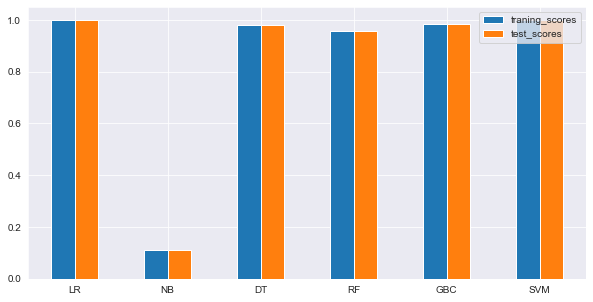

In [119]:
## Accuracy of traning set and  test set between models
m_df = pd.DataFrame({ 'traning_scores': traning_scores,'test_scores': test_scores}, index=model_name)
m_df.plot.bar(rot=0 ,figsize=(10,5))

## 3. Apply PCA To Models

**We will apply PCA to reduce dimensions then   compare the performance of the following 6 machine learning models

**I hope it will reduce the training time but keep the same accuracy

In [136]:
model_name=[]
traning_scores = []
test_scores = []

# Transform DATA
pca = PCA(n_components=10)  #      n_components=2
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.00874541 0.00602969 0.00589046 0.00562329 0.0055516  0.00518004
 0.00502082 0.00496632 0.00486048 0.00478891]


### 3.1 Logistic regression

In [146]:
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_pca, y_train)
#Predicting the test set results and caculating the accuracy
y_pred = logreg_pca.predict(X_test_pca)
a = logreg_pca.score(X_train_pca, y_train)
b = logreg_pca.score(X_test_pca, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('LR')
report = classification_report(y_test, y_pred)

print(report)

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.14      0.00      0.00     13003

    accuracy                           0.96    308477
   macro avg       0.55      0.50      0.49    308477
weighted avg       0.92      0.96      0.94    308477



In [151]:
report

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98    295474\n           1       0.14      0.00      0.00     13003\n\n    accuracy                           0.96    308477\n   macro avg       0.55      0.50      0.49    308477\nweighted avg       0.92      0.96      0.94    308477\n'

 **The accuracy is decreased comparing  to the without PCA process ( 100% )

### 3.2 Naive Bayes

In [138]:
nbclf_pca = GaussianNB().fit(X_train_pca, y_train)
#Predicting the test set results and caculating the accuracy
y_pred = nbclf_pca.predict(X_test_pca)
a = nbclf_pca.score(X_train_pca, y_train)
b = nbclf_pca.score(X_test_pca, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('NB')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    295474
           1       0.11      0.03      0.05     13003

    accuracy                           0.95    308477
   macro avg       0.53      0.51      0.51    308477
weighted avg       0.92      0.95      0.93    308477



 **The precision &  accuracy score is better than witout PCA   ( 11% )  

### 3.3 Decision tree

Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

In [139]:
dt_clf_pca = DecisionTreeClassifier(max_depth = 3).fit(X_train_pca, y_train)
y_pred = dt_clf_pca.predict(X_test_pca)
a = dt_clf_pca.score(X_train_pca, y_train)
b = dt_clf_pca.score(X_test_pca, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('DT')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.66      0.02      0.04     13003

    accuracy                           0.96    308477
   macro avg       0.81      0.51      0.51    308477
weighted avg       0.95      0.96      0.94    308477



 **The  accuracy compares to the method without PCA ( 94 % ) is reduced

### 3.4 Random forest

In [141]:
rf_clf_pca = RandomForestClassifier(n_estimators =5,max_depth =3)  #n_estimators default = 10
rf_clf_pca.fit(X_train_pca, y_train)
y_pred = rf_clf_pca.predict(X_test_pca)
a = rf_clf_pca.score(X_train_pca, y_train)
b = rf_clf_pca.score(X_test_pca, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('RF')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.68      0.00      0.00     13003

    accuracy                           0.96    308477
   macro avg       0.82      0.50      0.49    308477
weighted avg       0.95      0.96      0.94    308477



**The accuracy is decreased a litle bit compares to the previous one  (0.98)

### 3.5 Gradient boosting classifier

In [142]:
gb_clf_pca = GradientBoostingClassifier(n_estimators =2, max_depth =3, learning_rate=1)
gb_clf_pca.fit(X_train_pca, y_train)
y_pred = gb_clf_pca.predict(X_test_pca)
a = gb_clf_pca.score(X_train_pca, y_train)
b = gb_clf_pca.score(X_test_pca, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('GB')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.36      0.03      0.06     13003

    accuracy                           0.96    308477
   macro avg       0.66      0.52      0.52    308477
weighted avg       0.93      0.96      0.94    308477



 **The  accuracy compares to the method without PCA ( 80 % ) is reduced
**The training time is faster

### 3.6 SVM

In [143]:
svc_clf_pca =LinearSVC(C=1, max_iter=1000 , tol=0.4)   # C regularization parameter
svc_clf_pca.fit(X_train_pca, y_train)
y_pred = svc_clf_pca.predict(X_test_pca)
a = svc_clf_pca.score(X_train_pca, y_train)
b = svc_clf_pca.score(X_test_pca, y_test)
traning_scores.append(a)
test_scores.append(b)
model_name.append('SVM')
print(classification_report(y_test, y_pred))

c:\python\python37\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.00      0.00      0.00     13003

    accuracy                           0.96    308477
   macro avg       0.48      0.50      0.49    308477
weighted avg       0.92      0.96      0.94    308477



> The model learns nothing on Label 1 ( delay = yes)

 ### Conclusion

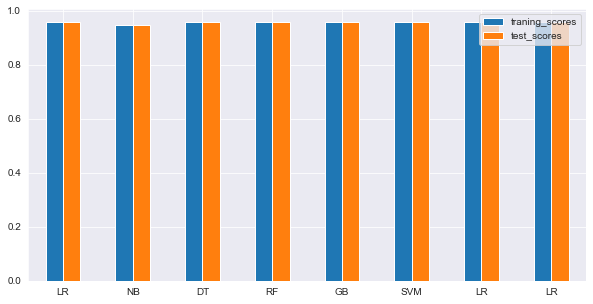

In [179]:

m_df_pcs_score = pd.DataFrame({ 'traning_scores': traning_scores,'test_scores': test_scores}, index=model_name)
m_df_pcs_score.plot.bar(rot=0 ,figsize=(10,5))

> None of models get overfiting or underfit

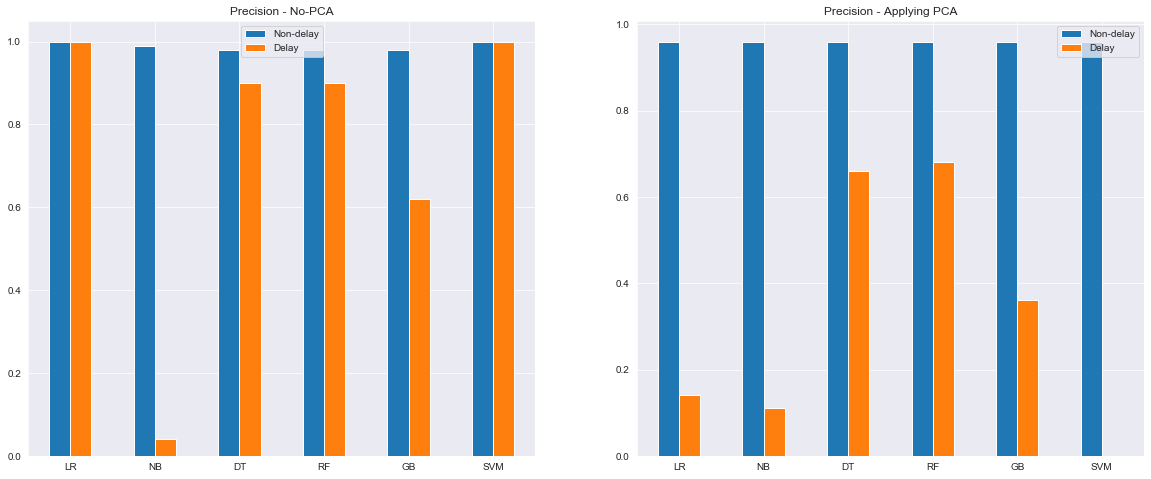

In [178]:
m_df_n_pca = pd.DataFrame({ 'Non-delay': [1, 0.99, 0.98, 0.98 , 0.98,1 ] ,'Delay': [1, 0.04,0.90,0.90, 0.62,1 ] }, index=['LR', 'NB', 'DT', 'RF','GB','SVM'])
m_df_pca = pd.DataFrame({ 'Non-delay': [0.96, 0.96, 0.96, 0.96 , 0.96,0.96 ] ,'Delay': [0.14, 0.11,0.66,0.68, 0.36,0 ] }, index=['LR', 'NB', 'DT', 'RF','GB','SVM'])

fig,  (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))

m_df_n_pca.plot.bar(rot=0 , ax=ax1)
ax1.set_title('Precision - No-PCA')
m_df_pca.plot.bar(rot=0 , ax=ax2)
ax2.set_title('Precision - Applying PCA')

plt.show()



   **the accuracy of delay label is decreased with PCA method. -> Maybe because of the imbalanced dataset, I'm thinking the way to improve this thing-> up-sample
   
   **The training time after applying PCA is shorter than No-PCA
   

## 4. Using gridsearchCV to obtain best parameters for models

We will use the dataset after applying PCA


### 4.1 Logistic regression

In [187]:
# C is the most important , C is the the inverse of regularization strength , C = 1/λ , the smaller the better
param_grid = {'C': [ 0.1, 1, 10, 100] } #0.001, 0.01, 0.1,
lr_grid = GridSearchCV(estimator = LogisticRegression() ,param_grid = param_grid, cv=3, scoring = 'accuracy', n_jobs =-1 )
# Fitting 3 folds , use metric as accuracy

In [188]:
lr_grid.fit(X_train_pca, y_train)


c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [189]:
lr_grid_best = lr_grid.best_estimator_

In [190]:
print('Best Penalty:', lr_grid.best_estimator_.get_params())

Best Penalty: {'C': 0.1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [194]:
lr_grid.best_score_

0.95776330724655

In [192]:
lr_grid_best.fit(X_train_pca, y_train)
#Predicting the test set results and caculating the accuracy
y_pred = lr_grid_best.predict(X_test_pca)
print(classification_report(y_test, y_pred))

c:\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.14      0.00      0.00     13003

    accuracy                           0.96    308477
   macro avg       0.55      0.50      0.49    308477
weighted avg       0.92      0.96      0.94    308477



 >  The same result with 3.1  -> the problem is dataset's features
 >  lr_grid.best_score_ = 0.957   <->   accuracy = 0.96 

### 4.2 Naive Bayes
  accuracy of the previous model (with PCA ) is  0.95

In [197]:
# priors 
#var_smoothing (default=1e-9) Portion of the largest variance of all features that is added to variances for calculation stability
param_grid = { 'var_smoothing': [  0.00001,0.0000001, 0.00000001,0.000000001,0.0000000001,0.0000000002,0.0000000003] } #0.001, 0.01, 0.1,
nb_grid = GridSearchCV(estimator = GaussianNB() ,param_grid = param_grid, cv=3, scoring = 'accuracy', n_jobs =-1 )
nb_grid.fit(X_train_pca, y_train)
nb_grid_best = nb_grid.best_estimator_
print('Best Penalty:', nb_grid.best_estimator_.get_params())
print('Best score:', nb_grid.best_score_)

Best Penalty: {'priors': None, 'var_smoothing': 1e-05}
Best score: 0.948075584521317


In [ ]:
# nb_grid_best.fit(X_train_pca, y_train)
# #Predicting the test set results and caculating the accuracy
# y_pred = nb_grid_best.predict(X_test_pca)
# print(classification_report(y_test, y_pred))

### 4.3 Decision tree
accuracy of the previous model (with PCA ) is  0.95

        precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.66      0.02      0.04     13003

In [199]:

#max_depth The maximum depth of the tree.
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [2, 3, 4, 5]}

dt_grid = GridSearchCV(estimator = DecisionTreeClassifier() ,param_grid = param_grid, cv=5, scoring = 'accuracy', n_jobs =-1 )
dt_grid.fit(X_train_pca, y_train)
dt_grid_best = dt_grid.best_estimator_
print('Best Penalty:', dt_grid.best_estimator_.get_params())
print('Best score:', dt_grid.best_score_)

Best Penalty: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
Best score: 0.958427401820286


In [200]:
y_pred = dt_grid.predict(X_test_pca)   #  gs.predict(X_test) is equivalent to gs.best_estimator_.predict(X_test)

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.68      0.03      0.05     13003

    accuracy                           0.96    308477
   macro avg       0.82      0.51      0.52    308477
weighted avg       0.95      0.96      0.94    308477



### 4.4 Random forest
accuracy of the previous model (with PCA ) is  0.96

        precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.68      0.00      0.00     13003

In [202]:
# priors 
#var_smoothing (default=1e-9) Portion of the largest variance of all features that is added to variances for calculation stability
#max_features : int, float, string or None, optional (default=”auto”)
#      The number of features to consider when looking for the best split:
#         If int, floatthen consider max_features features at each split.
#         If “auto”, then max_features=sqrt(n_features).
#         If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
#         If “log2”, then max_features=log2(n_features).
#         If None, then max_features=n_features
param_grid ={ 
                'n_estimators': [10,20,100,200],   # The number of trees in the forest. Default 10
                'max_features': ['auto', 'log2'],
                'max_depth' : [3,4,5,6,7],
                'criterion' :['gini', 'entropy']
            }
rf_grid = GridSearchCV(estimator = RandomForestClassifier() ,param_grid = param_grid, cv=3, scoring = 'accuracy', n_jobs =-1 )
rf_grid.fit(X_train_pca, y_train)
rf_grid_best = rf_grid.best_estimator_
print('Best Penalty:', rf_grid.best_estimator_.get_params())
print('Best score:', rf_grid.best_score_)

Best Penalty: {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best score: 0.9584315697778617


In [ ]:
 > Best n_estimators = 20

### 4.5 Gradient boosting classifier
accuracy of the previous model (with PCA ) is  0.96

     precision    recall  f1-score   support

           0       0.96      1.00      0.98    295474
           1       0.36      0.03      0.06     13003

In [203]:
# there are many parameters but i only tune  max_depth
param_grid ={'max_depth':[2,3,4,5,6] }
gb_grid = GridSearchCV(estimator = GradientBoostingClassifier(n_estimators =2,  learning_rate=1) ,param_grid = param_grid, cv=3, scoring = 'accuracy', n_jobs =-1 )
gb_grid.fit(X_train_pca, y_train)
gb_grid_best = gb_grid.best_estimator_
print('Best Penalty:',gb_grid.best_estimator_.get_params())
print('Best score:', gb_grid.best_score_)

Best Penalty: {'criterion': 'friedman_mse', 'init': None, 'learning_rate': 1, 'loss': 'deviance', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2, 'n_iter_no_change': None, 'presort': 'auto', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best score: 0.9581467593435189


In [ ]:
> best max_depth  = 2  -> not higher max_depth is better

### 4.6 SVM

Due to the imbalance data , I will **Undersample  the data


In [272]:
# concatenate our training data back together
X_resample  = pd.concat([X_train_scaled.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

In [275]:
# X_resample.head(25)

In [276]:
# X_resample.isnull().sum()/len(data)*100

In [277]:
# # separate minority and majority classes
not_fraud = X_resample[X_resample.isDelayed==0]


In [278]:
fraud = X_resample[X_resample.isDelayed==1]
del X_resample

In [279]:
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

In [280]:
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.isDelayed.value_counts()

1    30336
0    30336
Name: isDelayed, dtype: int64

In [281]:
# del X_resample
del not_fraud
gc.collect()

170

In [282]:
y_train_d = downsampled.isDelayed
X_train_d = downsampled.drop('isDelayed', axis=1)

In [ ]:
# there are many parameters but i only tune  max_depth

param_grid ={'kernel':['rbf','linear','poly'] }
svm_grid = GridSearchCV(estimator = SVC() ,param_grid = param_grid, cv=3, scoring = 'accuracy', n_jobs =-1 )
svm_grid.fit(X_train_d, y_train_d)
svm_grid_best = svm_grid.best_estimator_

In [286]:
print('Best Penalty:',svm_grid.best_estimator_.get_params())
print('Best score:', svm_grid.best_score_)

Best Penalty: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best score: 0.9928632647679325


 > Best Kernel is   'linear'   Best score: 0.9928632647679325
 > I wont predict() again  due to traning time is too long

### 4.7 KNeighborsClassifier

In [289]:
from sklearn.neighbors import KNeighborsClassifier

In [291]:
params_KNN = {'n_neighbors': [ 3, 4, 5, 6, 7]}
gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=3,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      n_jobs =-1,
                      return_train_score=True)

In [293]:
gs_KNN.fit(X_train_d, y_train_d);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 51.1min finished


In [294]:
knn_grid_best = gs_KNN.best_estimator_
print('Best Penalty:',gs_KNN.best_estimator_.get_params())
print('Best score:', gs_KNN.best_score_)

Best Penalty: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best score: 0.7126351529535865


In [298]:
y_pred = knn_grid_best.predict(X_test_scaled) 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.71      0.83    295474
           1       0.10      0.75      0.18     13003

    accuracy                           0.71    308477
   macro avg       0.54      0.73      0.50    308477
weighted avg       0.95      0.71      0.80    308477



 > **KNeighborsClassifier give the result which is not as good as others 

### Conclusion

    Since our tuning paramater is not very different from the default one so that the accuracy  is not changed much


In [266]:
# import sys
# def sizeof_fmt(num, suffix='B'):
#     ''' by Fred Cirera,  https://stackoverflow.com/a/1094933/1870254, modified'''
#     for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
#         if abs(num) < 1024.0:
#             return "%3.1f %s%s" % (num, unit, suffix)
#         num /= 1024.0
#     return "%.1f %s%s" % (num, 'Yi', suffix)

# for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
#                          key= lambda x: -x[1])[:10]:
#     print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

                X_train_scaled:  1.9 GiB
                 X_test_scaled: 828.4 MiB
                           _66: 515.6 MiB
                    final_data: 441.1 MiB
                           _72: 441.1 MiB
                          data: 426.5 MiB
                    data_dummy: 386.2 MiB
                   downsampled: 163.9 MiB
                     X_train_d: 163.4 MiB
                          _254: 163.4 MiB
